In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mc_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset/modcloth.xlsx')
mc_df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [ ]:
rr_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset/renttherunway.xlsx')
rr_df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [ ]:
mc_df_item_id = mc_df.drop_duplicates(['item_id'])['item_id']
mc_df_item_id.shape

(1378,)

In [ ]:
rr_df_item_id = rr_df.drop_duplicates(['item_id'])['item_id']
rr_df_item_id.shape

(5850,)

In [ ]:
#mc_df 와 rr_df 에 공유가능한 item_id 정보 확인
#확인결과 3개만 일치하고 우연히 item_id만 일치할 뿐 같은정보는 아닌 것으로 확인
mc_df_item_id[mc_df_item_id.isin(rr_df_item_id)]

0        123373
49756    537285
80850    800975
Name: item_id, dtype: int64

In [ ]:
rr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192481 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192194 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [ ]:
rr_df.describe()

,user_id,item_id,rating,size,age
count,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [ ]:
g_by_userid = mc_df.groupby('user_id', axis = 0).count()

sort_size = g_by_userid.sort_values(by=['item_id'], ascending = False)

sort_size.head(100)

g_by_itemid = mc_df.groupby('item_id', axis = 0).count()

sort_size2 = g_by_itemid.sort_values(by=['user_id'], ascending = False)

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset/mc_df_cp.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset/modcloth_preprocessing.xlsx')


df2[df2['user_id'] == '754084']


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,shoe size,shoe width,review_summary,review_text
user_id,,,,,,,,,,,,,,,,,
754084,27,0,27,27,27,27,27,27,0,27,27,27,27,27,27,25,25
684924,25,0,25,25,25,25,25,25,0,25,25,25,25,25,0,23,23
207153,23,0,23,23,23,23,23,23,0,23,23,23,23,23,23,22,22
500375,22,0,22,22,22,22,22,22,22,22,22,22,22,22,22,20,20
352484,22,0,22,22,22,22,22,22,0,22,22,22,22,22,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215751,14,0,14,14,14,14,14,14,0,14,14,14,14,14,14,12,12
577036,14,0,14,14,14,0,14,14,0,14,14,14,14,0,0,14,14
299963,14,0,14,14,14,14,14,14,0,14,14,14,14,0,0,13,13


In [ ]:

#KAGGLE 자료 : 사이즈 추천 의상 핏 데이터

#https://www.kaggle.com/datasets/rmisra/clothing-fit-dataset-for-size-recommendation


In [ ]:
#데이터의 특징 : 사이즈 값이 같은 사람에 따라서도 천차만별(같은 카테고리의 제품군이라도 같은사이즈가 특정인에게 적용되지 않을 수 있다)
#                옷 아이템별로도 사이즈 가이드표가 다르다(같은 치수라도 실제 사이즈는 다를 수 있음)                
#전처리 fit - length 가 just right 라고 한 사람들의 평균치로 신체사이즈가 비어있는 값을 채워넣는다. 
#사이즈 기준이 us 일 수도 있지만 uk(영국)일 수도 있어서(au, 호주도 있음) 군집분석을 통해 사이즈 표준국가군을 추측하는 것도 의미있을 듯
#fit 데이터가 과반수를 넘으므로 상당한 데이터 결측치를 보간할 수 있음

#나와 비슷한 체형조건을 가진 사람의 리뷰내용을 분석한 의상추천


In [ ]:
#미국 여자옷 사이즈 표 : https://www.sevenzone.com/bbs/board.php?bo_table=column&wr_id=377
#미국 옷 사이즈표, 여자, 남자, 아동복, 영국, 유럽 : https://m.blog.naver.com/how20909/221270457362
#https://modcloth.com/ 사이트 특정옷 구매시 사이즈별 기준신체측정치수 : https://modcloth.com/collections/sundresses/products/just-gotta-have-it-mini-dress-black-floral

In [ ]:
#https://modcloth.com/ 사이트 하의 사이즈도 여러국가별 치수로 표기될 수 있으며 하의든 상의든 서로 호환되는 치수를 가지거나 
#별도 하의 사이즈용 치수(24~32)가 있을 수 있음
##renttherunway.xlsx 사이트에서는 하의치수가 (24~32)로 된 경우 발견

In [ ]:
#renttherunway.xlsx 의 경우에는 사이트에 별도로 표준치수표는 없고 XS, S 등의 영문표기나 미국식 사이즈 숫자로만 고르도록 되어있음
#다른나라 표기와 혼용된 경우도 있음 FR 36 / US 4 이런식으로 대응되어 있도록(이 경우에는 us가 아닌 fr의 사이즈가 기록에 남는건가?? 확인이 필요해보임)
#renttherunway.xlsx 은 카테고리가 다양하므로 어떤게 하의이고 등의 기준정립과 그에따른 사이즈 기준 적용이 필요해보임

In [ ]:
#대신 구매하는 경우에 대한 판별이 필요함(내거를 구매하지 않는 경우)

In [ ]:
mc_df.shape

(82790, 18)

In [ ]:
mc_df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [ ]:
mc_df.columns = ['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text']

In [ ]:
rr_df.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

In [ ]:
rr_df.columns = ['fit', 'user_id', 'bust_size', 'item_id', 'weight', 'rating',
       'rented_for', 'review_text', 'body_type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date']

In [ ]:
#modcloth_final_data 데이터와 renttherunway데이터 통합을 위한 복사본 생성

mc_df.loc[37313, 'bust'] = 38
mc_df['bust'] = mc_df['bust'].astype('float')

mc_df_cp = mc_df.copy()
rr_df_cp = rr_df.copy()


In [ ]:
#modcloth_final_data 데이터 전처리

mc_df_cp.rename(columns={'quality':'rating', 'bust':'bust_size'}, inplace = True)

mc_df_cp.drop(['shoe_size', 'shoe_width'], axis = 1, inplace = True)

mc_df_cp.drop(['bra_size'], axis = 1, inplace = True)

mc_df_cp.drop(mc_df_cp[np.isnan(mc_df_cp['rating'])].index, inplace = True)

mc_df_cp.drop(mc_df_cp[mc_df_cp['height'].isnull()].index, inplace = True)

mc_df_cp.drop(mc_df_cp[(mc_df_cp['review_summary'].isnull()) | (mc_df_cp['review_text'].isnull())].index, inplace = True)

mc_df_cp.drop_duplicates(inplace = True)
#75993 rows × 16 columns -> 75632 rows × 16 columns

mc_df_cp.drop(['waist', 'hips', 'user_name'], axis = 1, inplace = True)

mc_df_cp['rating'] = mc_df_cp['rating']*2


In [ ]:
#renttherunway 데이터 전처리

rr_df_cp.drop(rr_df_cp[rr_df_cp['bust_size'].isnull()].index, inplace = True)

rr_df_cp['cup_size'] = rr_df_cp['bust_size'].str[2:]
rr_df_cp['bust_size'] = rr_df_cp['bust_size'].str[:2]
rr_df_cp['bust_size'] = rr_df_cp['bust_size'].astype('float')

rr_df_cp.drop(rr_df_cp[(rr_df_cp['review_summary'].isnull()) | (rr_df_cp['review_text'].isnull())].index, inplace = True)

rr_df_cp.drop(rr_df_cp[np.isnan(rr_df_cp['rating'])].index, inplace = True)

rr_df_cp.drop(rr_df_cp[rr_df_cp['height'].isnull()].index, inplace = True)

rr_df_cp.drop_duplicates(inplace = True)
#173764 rows × 16 columns -> 173594 rows × 16 columns

rr_df_cp.drop(['weight', 'rented_for', 'body_type', 'age', 'review_date'], axis = 1, inplace = True)



In [ ]:
# modcloth_final_data 데이터의 bust_size 가 대다수 누락되어 있으므로
# bust_size 데이터가 누락된 user_id 리스트 중 'fit' == 'fit'이고 'length' == 'just right'인 구매건에 대해 
# 동일한 item_id(item 여러개 구매시 여러개 값 가능), size 들의  'fit' == 'fit'이고 'length' == 'just right'인 다른 구매건에 해당하는 고객의 bust_size 사이즈들의 평균을 구해서 
# bust_size 데이터가 누락된 user_id 리스트 각각에 대입

g_by_userid = mc_df_cp[mc_df_cp['bust_size'].isnull() == True].groupby('user_id', axis = 0).count()

user_missing_cnt = pd.DataFrame({'item_cnt': g_by_userid['item_id']}) 

user_missing_cnt.sort_values(by=['item_cnt'], ascending = False, inplace = True)

user_missing_cnt = user_missing_cnt.rename_axis('user_id').reset_index()

#user_missing_cnt_10 = user_missing_cnt.head(10)


hip_mean = 0.0
new_df = pd.DataFrame(columns = {'user_id', 'item_id', 'bust_mean'})
new_df.drop(new_df.index, axis = 0, inplace = True)

#user_missing_cnt_10로 할 경우 상위 10개 고객에 대한 건만 진행, user_missing_cnt의 경우 누락된 값 가진 모든 user_id에 대해 진행(전체로 했을 시 좀 오래걸림)
for index, row in user_missing_cnt.iterrows():
  item_list = mc_df_cp[(mc_df_cp['user_id'] == row[0]) & (mc_df_cp['length'] == 'just right') & (mc_df_cp['fit'] == 'fit')][['user_id', 'item_id', 'size']]
  item_list.reset_index(drop = True, inplace = True)
  leng = len(item_list)
  for i in range(leng) : 
      bust_mean = mc_df_cp[(mc_df_cp['item_id'] == item_list['item_id'][i]) & (mc_df_cp['fit'] == 'fit') & (mc_df_cp['length'] == 'just right') & (mc_df_cp['size'] == item_list['size'][i])]['bust_size'].mean()
      df_temp = pd.DataFrame({'user_id' : [row[0]], 'item_id' : item_list['item_id'][i], 'bust_mean' : bust_mean})
      new_df = new_df.append(df_temp, ignore_index = True)
#12분 48초 소요

new_df_gby = new_df.groupby('user_id', axis = 0).mean()

for index, row in new_df_gby.iterrows():
    if(np.isnan(mc_df_cp.loc[mc_df_cp['user_id'] == index, 'bust_size']).all()):
        mc_df_cp.loc[mc_df_cp['user_id'] == index, 'bust_size'] = row['bust_mean']
    else : 
        mc_df_cp.loc[mc_df_cp['user_id'] == index, 'bust_size'] = max(mc_df_cp.loc[mc_df_cp['user_id'] == index, 'bust_size'])



In [ ]:
mc_df_cp.drop(mc_df_cp[mc_df_cp['size'] >= 20].index, inplace = True)

rr_df_cp.drop(rr_df_cp[rr_df_cp['size'] >= 20].index, inplace = True)

In [ ]:

mc_df_cp.drop(mc_df_cp[np.isnan(mc_df_cp['bust_size'])].index, inplace = True)

mc_df_cp.drop(['length'], axis = 1, inplace = True)

mc_rr_df = pd.concat([mc_df_cp,rr_df_cp], ignore_index=True)


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset')
mc_rr_df.to_excel('modcolth_rentway_integra_data.xlsx', index = False)
mc_df_cp.to_excel('mc_df_cp.xlsx', index = False)
rr_df_cp.to_excel('rr_df_cp.xlsx', index = False)

df_temp = pd.read_excel('modcolth_rentway_integra_data.xlsx')

df_temp.head()

df_temp.info()

In [ ]:
mc_rr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180354 entries, 0 to 180353
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   item_id         180354 non-null  int64  
 1   size            180354 non-null  int64  
 2   rating          180354 non-null  float64
 3   cup_size        177741 non-null  object 
 4   category        180354 non-null  object 
 5   bust_size       180354 non-null  float64
 6   height          180354 non-null  object 
 7   fit             180354 non-null  object 
 8   user_id         180354 non-null  int64  
 9   review_summary  180354 non-null  object 
 10  review_text     180354 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 15.1+ MB


In [ ]:
rr_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174133 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             174133 non-null  object 
 1   user_id         174133 non-null  int64  
 2   bust_size       174133 non-null  object 
 3   item_id         174133 non-null  int64  
 4   weight          151731 non-null  object 
 5   rating          174065 non-null  float64
 6   rented_for      174126 non-null  object 
 7   review_text     174083 non-null  object 
 8   body_type       165575 non-null  object 
 9   review_summary  173856 non-null  object 
 10  category        174133 non-null  object 
 11  height          173581 non-null  object 
 12  size            174133 non-null  int64  
 13  age             173212 non-null  float64
 14  review_date     174133 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 21.3+ MB


In [ ]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  float64
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76058 non-null  object 
 17  review_text     76058 non-null 

In [ ]:
mc_df_cp.describe()

,item_id,size,rating,bust_size,user_id
count,54070.000000,54070.000000,54070.000000,54070.000000,54070.000000
mean,501316.019401,11.965304,8.008175,37.937991,499951.276031
std,197243.835431,7.656841,1.941612,4.272488,286452.787265
min,152702.000000,0.000000,2.000000,20.000000,6.000000
25%,397005.000000,8.000000,6.000000,35.000000,253168.750000
50%,486643.000000,12.000000,8.000000,36.824619,499549.000000
75%,668696.000000,15.000000,10.000000,40.000000,745563.000000
max,807722.000000,38.000000,10.000000,59.000000,999972.000000


In [ ]:
mc_df[mc_df['bust'].isnull() == False].head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
9,123373,NaN,13,5.0,dd/e,41.0,36.0,new,39,5ft 6in,laurenpolzin,just right,fit,950172,9.0,NaN,NaN,NaN
23,123373,NaN,5,5.0,c,32.0,34.0,new,34,5ft 1in,Michelle,just right,small,990166,7.0,average,NaN,NaN
27,123373,NaN,9,5.0,c,35.0,34.0,new,36,5ft 6in,mmmjulie,slightly long,small,129669,NaN,NaN,NaN,NaN
40,123373,NaN,18,5.0,ddd/f,44.0,38.0,new,43,5ft 4in,Michelle,just right,small,889569,8.5,average,NaN,NaN


In [ ]:
missing_data = pd.DataFrame({'total_missing': mc_df.isnull().sum(), 'perc_missing': (mc_df.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
item_id,0,0.000000
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


In [ ]:
#아이템별로 fit : fit이고 length : just right인 사람들의 신체사이즈의 평균으로 null 값을 채우기
#그 전에 신체 사이즈에 대한 적절한 전처리부터 추가해야함

In [ ]:
#신체정보 누락 고객이 아이템을 몇개 샀는지? 

In [ ]:
for index, row in user_missing_cnt_10.iterrows():
    print(type(index))
    print(index)
    print('~~~~~~')

    print(type(row))
    print(row)
    print('------')

    print(row['item_cnt'])
    print(row[0])
    print(row.item_cnt)
    print('======\n')


for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

In [ ]:
mc_df.loc[37313, 'bust'] = 38
mc_df['bust'] = mc_df['bust'].astype('float')

In [ ]:
# mc_df 의 bust, hips 데이터가 누락된 user_id 리스트 중 'fit' == 'fit'이고 'length' == 'just right'인 구매건에 대해 
# 동일한 item_id(item 여러개 구매시 여러개 값 가능), size 의 'length' == 'just right'인 다른 구매건에 해당하는 고객의 hips 사이즈들의 평균을 구해서 
# hips 데이터가 누락된 user_id 리스트 각각에 대입


g_by_userid = mc_df[(mc_df['hips'].isnull() == True) | (mc_df['bust'].isnull() == True)].groupby('user_id', axis = 0).count()

user_missing_cnt = pd.DataFrame({'item_cnt': g_by_userid['item_id']}) 

user_missing_cnt.sort_values(by=['item_cnt'], ascending = False, inplace = True)

#user_missing_cnt['index'] = user_missing_cnt.index

#user_missing_cnt = user_missing_cnt.drop('index', axis = 1)

user_missing_cnt = user_missing_cnt.rename_axis('user_id').reset_index()
#user_missing_cnt.rename(columns = {'index':'user_id'}, inplace = True)

user_missing_cnt_10 = user_missing_cnt.head(10)
#missing value 별 인원수 통계 구해보기

#print(user_missing_cnt.size)


hip_mean = 0.0
new_df = pd.DataFrame(columns = {'user_id', 'item_id', 'hip_mean', 'bust_mean'})
new_df.drop(new_df.index, axis = 0, inplace = True)

#user_missing_cnt_10로 할 경우 상위 10개 고객에 대한 건만 진행, user_missing_cnt의 경우 누락된 값 가진 모든 user_id에 대해 진행(전체로 했을 시 좀 오래걸림)
for index, row in user_missing_cnt_10.iterrows():
  item_list = mc_df[(mc_df['user_id'] == row[0]) & (mc_df['length'] == 'just right') & (mc_df['fit'] == 'fit')][['user_id', 'item_id', 'size']]
  item_list.reset_index(drop = True, inplace = True)
  leng = len(item_list)
  for i in range(leng) : 
      hip_mean = mc_df[(mc_df['item_id'] == item_list['item_id'][i]) & (mc_df['fit'] == 'fit') & (mc_df['length'] == 'just right') & (mc_df['size'] == item_list['size'][i])]['hips'].mean()
      bust_mean = mc_df[(mc_df['item_id'] == item_list['item_id'][i]) & (mc_df['fit'] == 'fit') & (mc_df['length'] == 'just right') & (mc_df['size'] == item_list['size'][i])]['bust'].mean()
      df_temp = pd.DataFrame({'user_id' : [row[0]], 'item_id' : item_list['item_id'][i], 'hip_mean' : hip_mean, 'bust_mean' : bust_mean})
      new_df = new_df.append(df_temp, ignore_index = True)
      #new_df.append({'user_id' : [499049], 'item_id' : item_list['item_id'][i], 'hip_mean' : [hip_mean]]})


  item_list = mc_df[(mc_df['user_id'] == 10501) & (mc_df['length'] == 'just right') & (mc_df['fit'] == 'fit')][['user_id', 'item_id', 'size']]
  item_list.reset_index(drop = True, inplace = True)
  leng = len(item_list)
  for i in range(leng) : 
      hip_mean = mc_df[(mc_df['item_id'] == item_list['item_id'][i]) & (mc_df['fit'] == 'fit') & (mc_df['length'] == 'just right') & (mc_df['size'] == item_list['size'][i])]['hips'].mean()
      bust_mean = mc_df[(mc_df['item_id'] == item_list['item_id'][i]) & (mc_df['fit'] == 'fit') & (mc_df['length'] == 'just right') & (mc_df['size'] == item_list['size'][i])]['bust'].mean()
      df_temp = pd.DataFrame({'user_id' : [10501], 'item_id' : item_list['item_id'][i], 'hip_mean' : hip_mean, 'bust_mean' : bust_mean})
      new_df = new_df.append(df_temp, ignore_index = True)
      #new_df.append({'user_id' : [499049], 'item_id' : item_list['item_id'][i], 'hip_mean' : [hip_mean]]})

new_df.head(50)

new_df_gby = new_df.groupby('user_id', axis = 0).mean()


mc_df_prepro = mc_df.copy()

#mc_df_prepro['bust'] = mc_df_prepro['bust'].astype('float')

for index, row in new_df_gby.iterrows():
    #mc_df_prepro2[mc_df_prepro2['user_id'] == index]['hips'] = row['hip_mean']
    if(np.isnan(mc_df_prepro.loc[mc_df_prepro['user_id'] == index, 'hips']).all()):
        mc_df_prepro.loc[mc_df_prepro['user_id'] == index, 'hips'] = row['hip_mean']
    else : 
        mc_df_prepro.loc[mc_df_prepro['user_id'] == index, 'hips'] = max(mc_df_prepro.loc[mc_df_prepro['user_id'] == index, 'hips'])
    if(np.isnan(mc_df_prepro.loc[mc_df_prepro['user_id'] == index, 'bust']).all()):
        mc_df_prepro.loc[mc_df_prepro['user_id'] == index, 'bust'] = row['bust_mean']
    else : 
        mc_df_prepro.loc[mc_df_prepro['user_id'] == index, 'bust'] = max(mc_df_prepro.loc[mc_df_prepro['user_id'] == index, 'bust'])



In [ ]:
# mc_df 의 bust 데이터가 누락된 user_id 리스트 중 'fit' == 'fit'이고 'length' == 'just right'인 구매건에 대해 
# 동일한 item_id(item 여러개 구매시 여러개 값 가능), size 의 'length' == 'just right'인 다른 구매건에 해당하는 고객의 hips 사이즈들의 평균을 구해서 
# hips 데이터가 누락된 user_id 리스트 각각에 대입

g_by_userid = mc_df_cp[mc_df_cp['bust_size'].isnull() == True].groupby('user_id', axis = 0).count()

user_missing_cnt = pd.DataFrame({'item_cnt': g_by_userid['item_id']}) 

user_missing_cnt.sort_values(by=['item_cnt'], ascending = False, inplace = True)

#user_missing_cnt['index'] = user_missing_cnt.index

#user_missing_cnt = user_missing_cnt.drop('index', axis = 1)

user_missing_cnt = user_missing_cnt.rename_axis('user_id').reset_index()
#user_missing_cnt.rename(columns = {'index':'user_id'}, inplace = True)

#user_missing_cnt_10 = user_missing_cnt.head(10)
#missing value 별 인원수 통계 구해보기

#print(user_missing_cnt.size)


hip_mean = 0.0
new_df = pd.DataFrame(columns = {'user_id', 'item_id', 'bust_mean'})
new_df.drop(new_df.index, axis = 0, inplace = True)

#user_missing_cnt_10로 할 경우 상위 10개 고객에 대한 건만 진행, user_missing_cnt의 경우 누락된 값 가진 모든 user_id에 대해 진행(전체로 했을 시 좀 오래걸림)
for index, row in user_missing_cnt.iterrows():
  item_list = mc_df_cp[(mc_df_cp['user_id'] == row[0]) & (mc_df_cp['length'] == 'just right') & (mc_df_cp['fit'] == 'fit')][['user_id', 'item_id', 'size']]
  item_list.reset_index(drop = True, inplace = True)
  leng = len(item_list)
  for i in range(leng) : 
      #hip_mean = mc_df_cp[(mc_df_cp['item_id'] == item_list['item_id'][i]) & (mc_df_cp['fit'] == 'fit') & (mc_df_cp['length'] == 'just right') & (mc_df_cp['size'] == item_list['size'][i])]['hips'].mean()
      bust_mean = mc_df_cp[(mc_df_cp['item_id'] == item_list['item_id'][i]) & (mc_df_cp['fit'] == 'fit') & (mc_df_cp['length'] == 'just right') & (mc_df_cp['size'] == item_list['size'][i])]['bust_size'].mean()
      df_temp = pd.DataFrame({'user_id' : [row[0]], 'item_id' : item_list['item_id'][i], 'bust_mean' : bust_mean})
      new_df = new_df.append(df_temp, ignore_index = True)
      #new_df.append({'user_id' : [499049], 'item_id' : item_list['item_id'][i], 'hip_mean' : [hip_mean]]})
#12분 48초 소요

new_df_gby = new_df.groupby('user_id', axis = 0).mean()

#mc_df_cp['bust'] = mc_df_cp['bust'].astype('float')

for index, row in new_df_gby.iterrows():
    if(np.isnan(mc_df_cp.loc[mc_df_cp['user_id'] == index, 'bust_size']).all()):
        mc_df_cp.loc[mc_df_cp['user_id'] == index, 'bust_size'] = row['bust_mean']
    else : 
        mc_df_cp.loc[mc_df_cp['user_id'] == index, 'bust_size'] = max(mc_df_cp.loc[mc_df_cp['user_id'] == index, 'bust_size'])



<class 'pandas.core.frame.DataFrame'>
Int64Index: 74642 entries, 6725 to 82789
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         74642 non-null  int64  
 1   size            74642 non-null  int64  
 2   rating          74642 non-null  float64
 3   cup_size        69225 non-null  object 
 4   category        74642 non-null  object 
 5   bust_size       54070 non-null  float64
 6   height          74642 non-null  object 
 7   fit             74642 non-null  object 
 8   user_id         74642 non-null  int64  
 9   review_summary  74642 non-null  object 
 10  review_text     74642 non-null  object 
 11  length          74618 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 9.4+ MB


In [ ]:
?new_df.drop

In [ ]:

new_df_gby.size

new_df_gby.index.iterrows():

for index, row in new_df_gby.iterrows():
    print(type(index))
    print(index)
    print('~~~~~~')

    print(type(row))
    print(row)
    print('------')

    print(row['hip_mean'])
    print(row[0])
    print(row.hip_mean)
    print('======\n')

<class 'int'>
499049
~~~~~~
<class 'pandas.core.series.Series'>
hip_mean    58.0
Name: 499049, dtype: float64
------
58.0
58.0
58.0



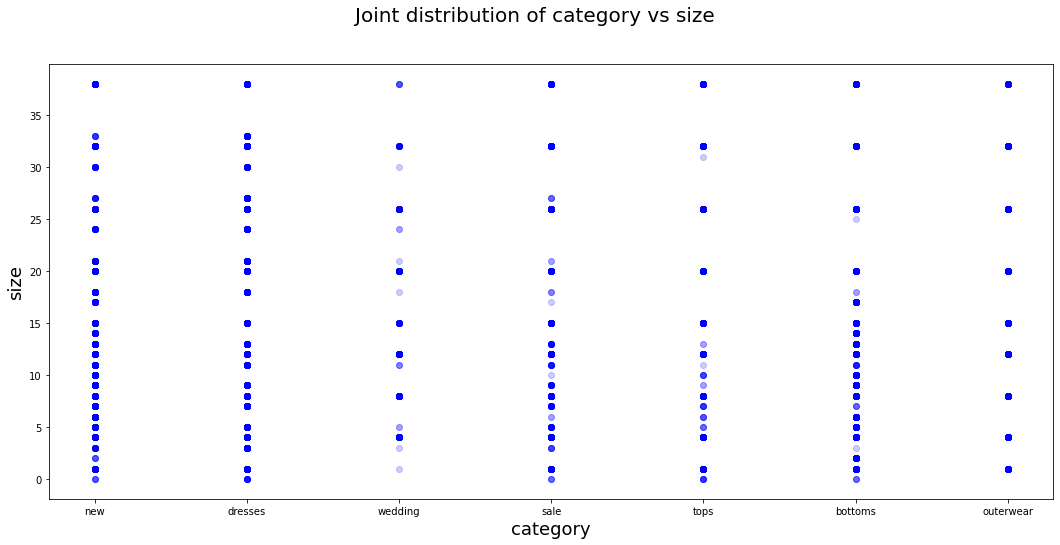

In [ ]:
plt.figure(figsize=(18,8))
plt.xlabel("category", fontsize=18)
plt.ylabel("size", fontsize=18)
plt.suptitle("Joint distribution of category vs size", fontsize= 20)
#plt.plot(mc_df['bra_size'], mc_df['size'], 'bo', alpha=0.2)
plt.plot(mc_df.category, mc_df['size'], 'bo', alpha=0.2)
plt.show()

In [ ]:

g_by_userid = mc_df[(mc_df['hips'].isnull() == True) | (mc_df['bust'].isnull() == True)].groupby('user_id', axis = 0).count()

user_missing_cnt = pd.DataFrame({'item_cnt': g_by_userid['item_id']}) 


size_cnt_df = pd.DataFrame({'size_cnt' : mc_df['size'].value_counts()})
size_cnt_df = size_cnt_df.rename_axis('size').reset_index()

#size_cnt_df.sort_values(by=['size'], ascending = True, inplace = True)

plt.figure(figsize=(15,15))
plt.bar(size_cnt_df['size'], size_cnt_df['size_cnt'])
#plt.pie(size_cnt_df['size_cnt'], labels = size_cnt_df['size'], autopct = '%.2f')
#plt.hist(size_cnt_df['size'], cumulative=True, histtype = 'barstacked', bins = 150)
plt.xlabel("size", fontsize=20)
plt.ylabel("size count on Modcloth", fontsize=18)



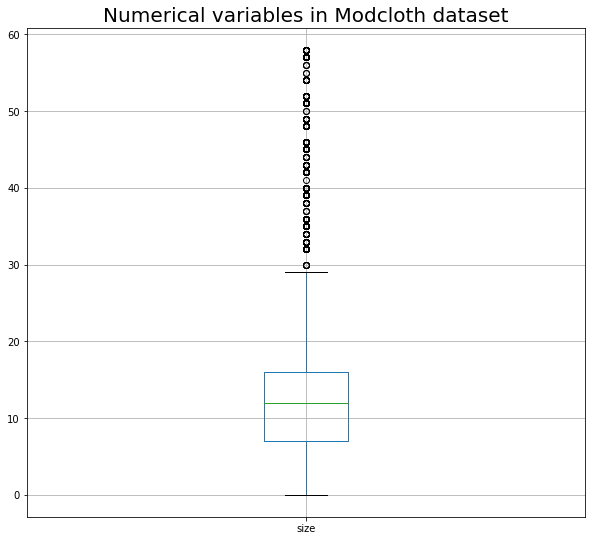

In [ ]:
num_cols = ['size']
plt.figure(figsize=(10,9))
rr_df_cp[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

In [ ]:
#https://chbskzzz.tistory.com/m/264
#누적합 그래프 구하기

In [ ]:
#중복된 행 검출후 삭제(동일유저, 동일 아이템 기준)
g_by_userid = mc_df.groupby(['user_id', 'item_id'], axis = 0).count()

g_by_userid2 = rr_df.groupby(['user_id', 'item_id'], axis = 0).count()

user_item_cnt = pd.DataFrame({'cnt': g_by_userid[g_by_userid['size'] > 1]['size']}) 
#382 rows
user_item_cnt2 = pd.DataFrame({'cnt': g_by_userid2[g_by_userid2['size'] > 1]['size']}) 
#266 rows × 1 columns


len(g_by_userid.index)

g_by_userid.shape[0]

g_by_userid[g_by_userid.columns[0]].count() #(== number of non-NaN values in first column)


mc_df_prepro.shape
#82790, 18
#382개 중복

mc_df_prepro.drop_duplicates(['user_id','item_id'])
#82413 rows × 18 columns

mc_df_prepro[(mc_df_prepro['user_id'] == 7185) & (mc_df_prepro['item_id'] == 407044)]


mc_df_prepro = mc_df.copy()
mc_df_prepro.drop_duplicates(inplace = True)
#82413 rows × 18 columns
mc_df_prepro.drop_duplicates(['user_id','item_id'], inplace = True)
#82408 rows × 18 columns


rr_df_prepro = rr_df.copy()
rr_df_prepro.shape
#192544 rows × 15 columns

rr_df_prepro.drop_duplicates(inplace = True)
#192355 rows × 15 columns

rr_df_prepro.drop_duplicates(['user_id','item_id'], inplace = True)
#192278 rows × 15 columns
#192278 rows × 15 columns


,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36.0,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36.0,outerwear,NaN,5ft 8in,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34.0,outerwear,NaN,5ft 5in,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32.0,outerwear,NaN,5ft 4in,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,5ft 3in,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


In [ ]:
mc_df_prepro['category'].value_counts()

new          21488
tops         20364
dresses      18650
bottoms      15266
outerwear     4223
sale          2524
wedding        275
Name: category, dtype: int64

In [ ]:
rr_df_prepro['category'].value_counts()

dress         92884
gown          44381
sheath        19316
shift          5365
jumpsuit       5184
              ...  
caftan            4
overcoat          2
sweatpants        2
crewneck          1
buttondown        1
Name: category, Length: 68, dtype: int64

In [ ]:
#mc_df, rr_df 통합기준


item_id: unique product id		-  		item_id

waist: waist measurement of customer

size: the standardized size of the product		- 		size

quality: rating for the product				- 		rating

cup size: cup size measurement of customer

hips: hip measurement of customer

bra size: bra size of customer

category: the category of the product			- 		category

bust: bust measurement of customer			-		bust size

height: height of the customer				-		height

length: feedback on the length of the product

fit: fit feedback					- 		fit

user_id: a unique id for the customer			-		user_id

shoe size: shoe size of the customer

shoe width: shoe width of the customer

review_text: review of customer			- 	review_text	

review_summary: review summary			- review_summary





weight: weight measurement of customer

rented for: purpose clothing was rented for

body type: body type of customer

age: age of the customer

review_date: date when the review was written


In [ ]:
result2 = pd.concat([df1,df2], ignore_index=True)
print(result2)